In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Computation':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Computation')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1707004902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1707004902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1707004887.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1707004905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1707004906.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1707004905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1707004907.0, "/Library/Developer/CommandLineT

/var/folders/7c/j9mzb7pn0wn1k_f9j58c8y480000gn/T/ipykernel_29389/2346635964.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
import numpy as np

np.random.seed(2024)

def U(x):
    return x**2/2 + x**4/4

def pi(x):
    return np.exp(-U(x))

def md(num_samples, initial_state, initial_velocity, timestep=0.1):
    samples = [initial_state]
    current_state = initial_state
    current_velocity = initial_velocity
    current_time = 0

    for _ in range(num_samples - 1):
        proposed_state = current_state + current_velocity * timestep
        current_time += timestep
        if current_state * proposed_state < 0 and np.random.rand() < 1/2:
            current_velocity = (-1) * np.sign(current_velocity) * np.sqrt(-2 * np.log(np.random.rand() + 1e-7))
        else:
            current_velocity = current_velocity - ( current_state + current_state ** 3 ) * timestep
            current_state = proposed_state
        samples.append(current_state)

    return np.array(samples)

# サンプル数と初期条件を固定
num_samples = 10000
initial_state = 0.0
initial_velocity = 1.0

samples_MD = md(num_samples * 10, initial_state, initial_velocity, timestep=0.01)

In [3]:
#| echo: false
ISMblue = "#2f579c"
SaddleBrown = "#8b4513"
minty = "#78C2AD"

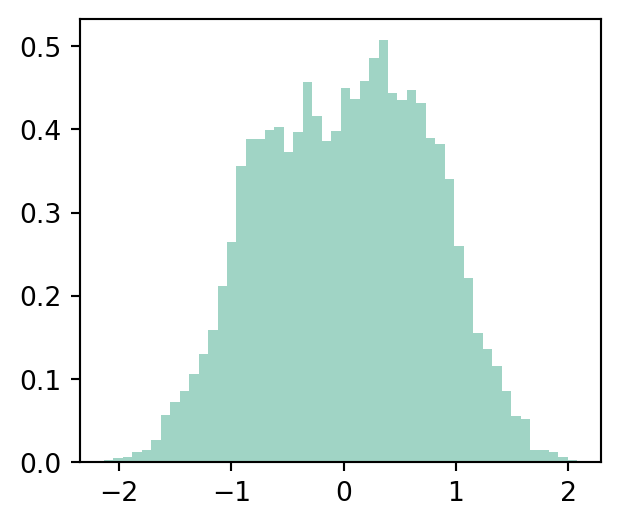

In [4]:
#| echo: false
#| fig-cap: 分子動力学法からのサンプル
#| label: fig-MD
import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 3))
plt.hist(samples_MD, bins=50, density=True, alpha=0.7, color=minty)
plt.show()

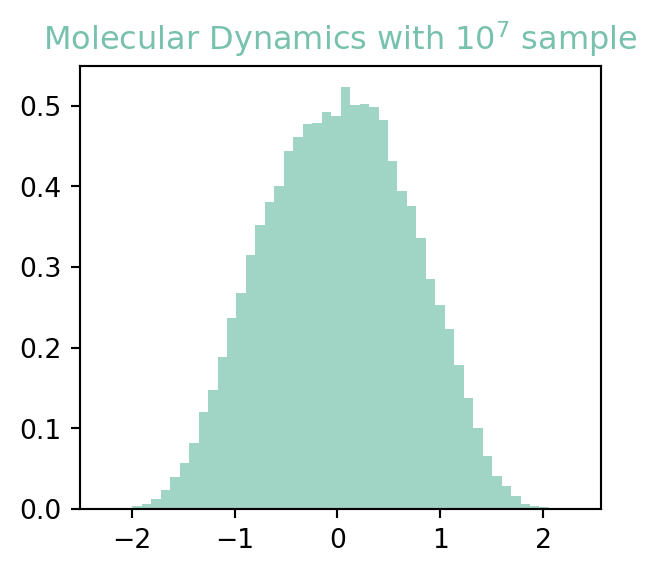

In [5]:
#| echo: false
samples_MD = md(num_samples * 100, initial_state, initial_velocity, timestep=0.01)
plt.figure(figsize=(3.5, 3), #facecolor="#F0F1EB"
)
plt.hist(samples_MD, bins=50, density=True, alpha=0.7, color=minty)
plt.title('Molecular Dynamics with $10^7$ sample', color=minty)
# plt.gca().set_facecolor('#F0F1EB')
plt.show()

In [6]:
def metropolis(num_samples, initial_state, verbose=False):
    samples = [initial_state]
    current_state = initial_state

    accept = []

    for _ in range(num_samples - 1):
        proposed_state = current_state + np.random.uniform(-2,2)
        acceptance_ratio = pi(proposed_state) / pi(current_state)
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state
            accept.append(True)
        samples.append(current_state)

    if verbose:
        rate = len(accept) / num_samples
        print(f'acceptance rate : {rate}')

    return np.array(samples)

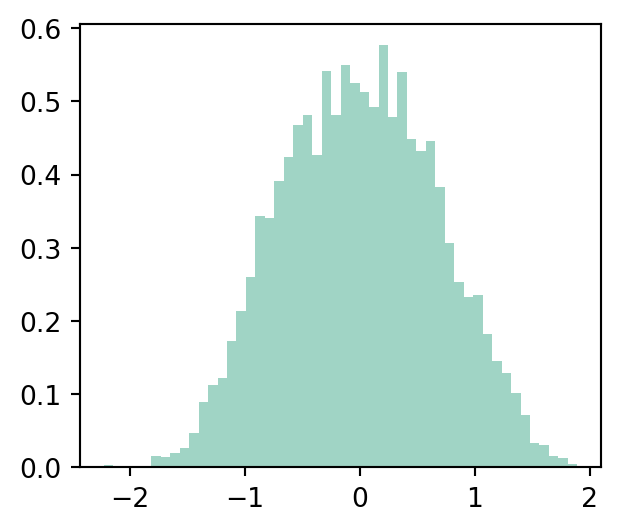

In [7]:
#| echo: false
#| fig-cap: Metropolis 法からのサンプル
#| label: fig-MH
samples_MH = metropolis(num_samples, initial_state, verbose=False)
plt.figure(figsize=(3.5, 3))
plt.hist(samples_MH, bins=50, density=True, alpha=0.7, color=minty)
plt.show()

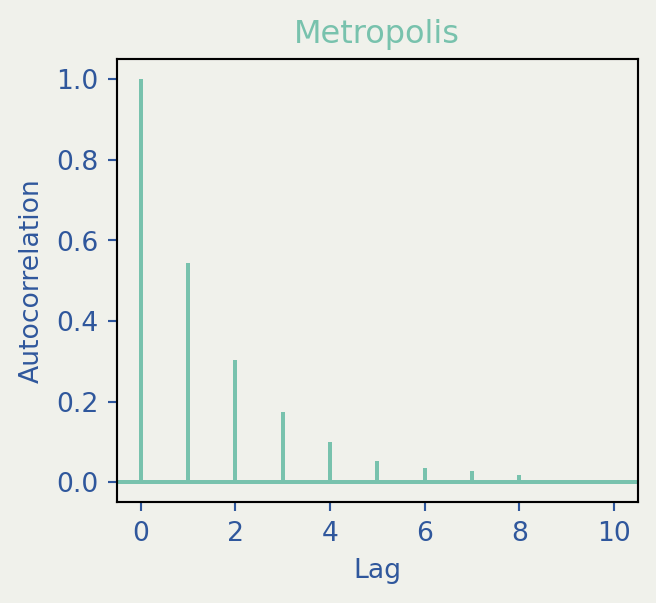

In [8]:
#| echo: false
#| fig-cap: Metropolis 法の自己相関関数
#| label: fig-MH-auto
plt.figure(figsize=(3.5, 3), facecolor="#F0F1EB"
)
plt.acorr(samples_MH - np.mean(samples_MH), maxlags=10, color=minty)
plt.xlim(-0.5, 10.5)
#plt.ylim(-0.5,0.85)
# グラフの装飾
plt.title('Metropolis', color=minty)
plt.tick_params(axis='x', colors=ISMblue)
plt.tick_params(axis='y', colors=ISMblue)
plt.xlabel('Lag', color=ISMblue)
plt.ylabel('Autocorrelation', color=ISMblue)
plt.gca().set_facecolor('#F0F1EB')
plt.savefig('MH_auto.svg', format='svg')
plt.show()

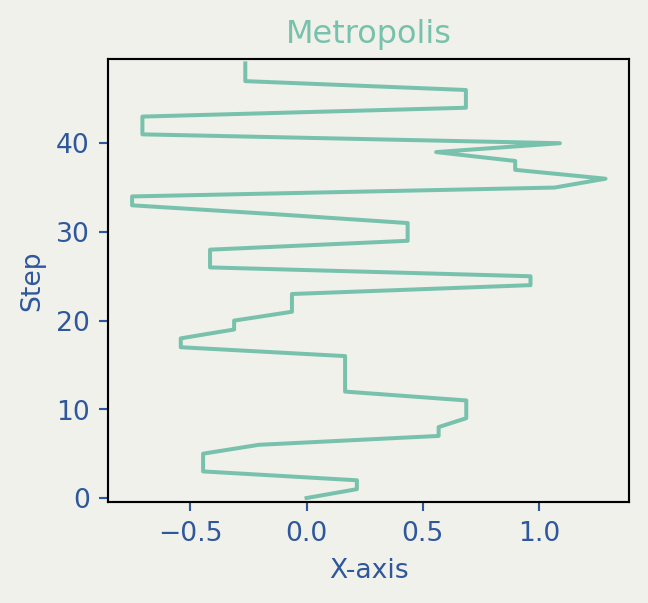

In [9]:
#| echo: false
#| fig-cap: Metropolis 法の軌跡
#| label: fig-1
plt.figure(figsize=(3.5, 3), facecolor="#F0F1EB"
)
plt.plot(samples_MH[0:50], range(50), color=minty)
plt.ylim(-0.5, 49.5)
#plt.xlim(-1.2,1.2)
# グラフの装飾
plt.title('Metropolis', color=minty)
plt.tick_params(axis='x', colors=ISMblue)
plt.tick_params(axis='y', colors=ISMblue)
plt.xlabel('X-axis', color=ISMblue)
plt.ylabel('Step', color=ISMblue)
plt.gca().set_facecolor('#F0F1EB')
plt.savefig('MH_traj.svg', format='svg')
plt.show()

In [10]:
def lifted_metropolis(num_samples, initial_state, verbose=False):
    samples = [initial_state]
    current_state = initial_state
    lifting_variable = 1
    accept = []

    for _ in range(num_samples - 1):
        delta = np.random.uniform(0,2)
        proposed_state = current_state + lifting_variable * delta
        acceptance_ratio = pi(proposed_state) / pi(current_state)

        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state
            accept.append(True)
        else:
            lifting_variable = (-1) * lifting_variable

        samples.append(current_state)
    
    if verbose:
        rate = len(accept) / num_samples
        print(f'acceptance rate : {rate}')

    return np.array(samples)

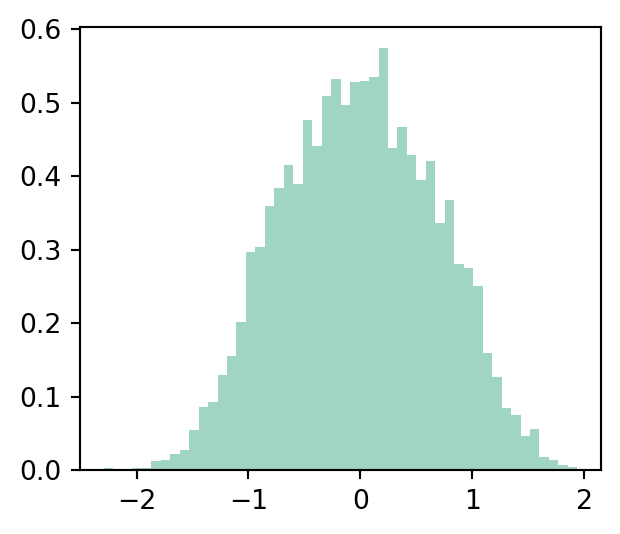

In [11]:
#| echo: false
#| fig-cap: 非対称 Metropolis 法からのサンプル
#| label: fig-LMH
samples_LMH = lifted_metropolis(num_samples, initial_state)
plt.figure(figsize=(3.5, 3))
plt.hist(samples_LMH, bins=50, density=True, alpha=0.7, color=minty)
plt.show()

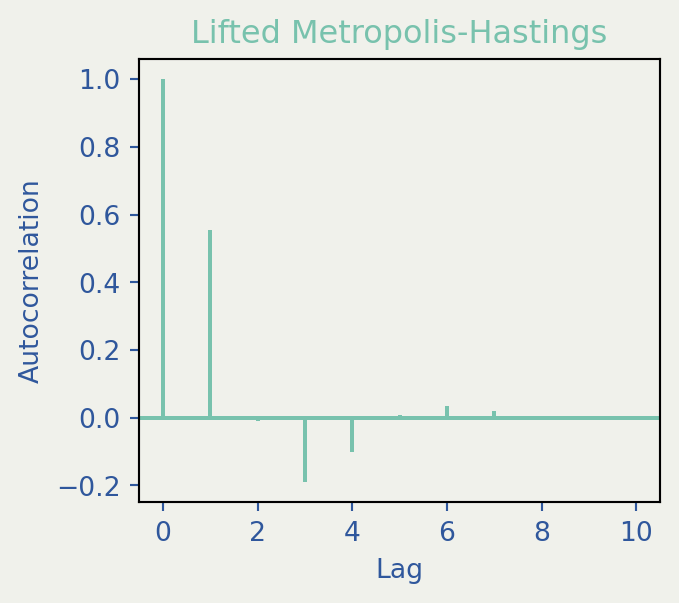

In [12]:
#| echo: false
#| fig-cap: 非対称 Metropolis 法の自己相関関数
#| label: fig-LMH-auto
plt.figure(figsize=(3.5, 3), facecolor="#F0F1EB"
)
plt.acorr(samples_LMH - np.mean(samples_LMH), maxlags=10, color=minty)
plt.xlim(-0.5, 10.5)
#plt.ylim(-0.5,0.85)
# グラフの装飾
plt.title('Lifted Metropolis-Hastings', color=minty)
plt.tick_params(axis='x', colors=ISMblue)
plt.tick_params(axis='y', colors=ISMblue)
plt.xlabel('Lag', color=ISMblue)
plt.ylabel('Autocorrelation', color=ISMblue)
plt.savefig('LMH_auto.svg', format='svg')
plt.gca().set_facecolor('#F0F1EB')
plt.show()

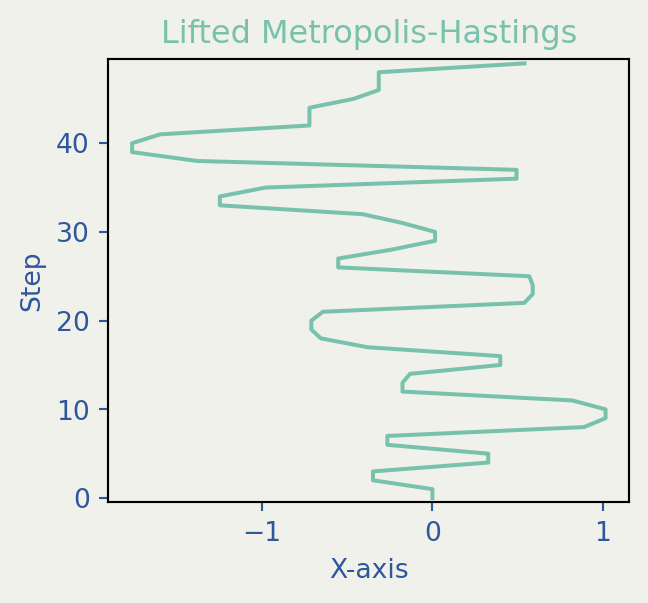

In [13]:
#| echo: false
#| fig-cap: 非対称 Metropolis 法の軌跡
#| label: fig-4
plt.figure(figsize=(3.5, 3), facecolor="#F0F1EB"
)
plt.plot(samples_LMH[0:50], range(50), color=minty)
plt.ylim(-0.5, 49.5)
#plt.xlim(-1.2,1.2)
# グラフの装飾
plt.title('Lifted Metropolis-Hastings', color=minty)
plt.tick_params(axis='x', colors=ISMblue)
plt.tick_params(axis='y', colors=ISMblue)
plt.xlabel('X-axis', color=ISMblue)
plt.ylabel('Step', color=ISMblue)
plt.savefig('LMH_traj.svg', format='svg')
plt.gca().set_facecolor('#F0F1EB')
plt.show()

In [14]:
#| output: false
import math

def zigzag(num_samples, initial_state, step=1):
    samples = [initial_state]
    trajectory = [initial_state]
    current_state = initial_state
    lifting_variable = 1
    t = 0

    while t < num_samples * step:
        state_event = lifting_variable * np.sqrt(-1 + np.sqrt( 1 - 4 * np.log(np.random.rand()) ))
        t_event = t + np.abs(state_event - current_state)
        for _ in np.arange(np.ceil(t/step)*step, np.ceil(t_event/step)*step, step):
              samples.append(current_state + lifting_variable * (_ - t))
        current_state = state_event
        trajectory.append(current_state)
        lifting_variable = (-1) * lifting_variable
        t = t_event

    return np.array(samples), np.array(trajectory)

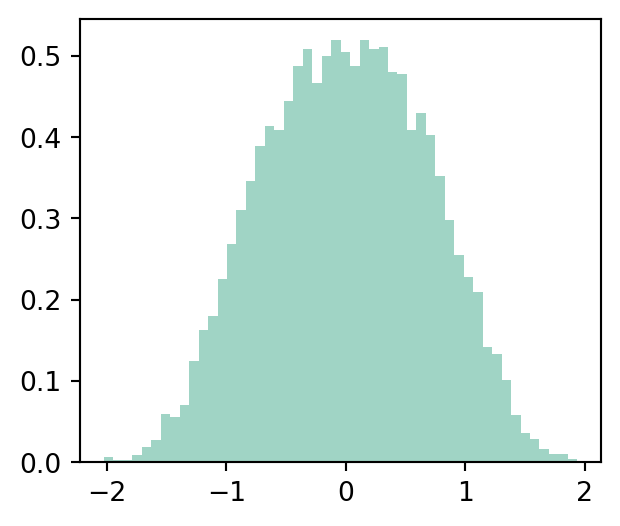

In [15]:
#| fig-cap: Zig-Zag サンプラーからのサンプル
#| label: fig-PDMP
samples_zigzag, trajectory_zigzag = zigzag(num_samples, initial_state, step=2)
plt.figure(figsize=(3.5, 3))
plt.hist(samples_zigzag, bins=50, density=True, alpha=0.7, color=minty)
plt.show()

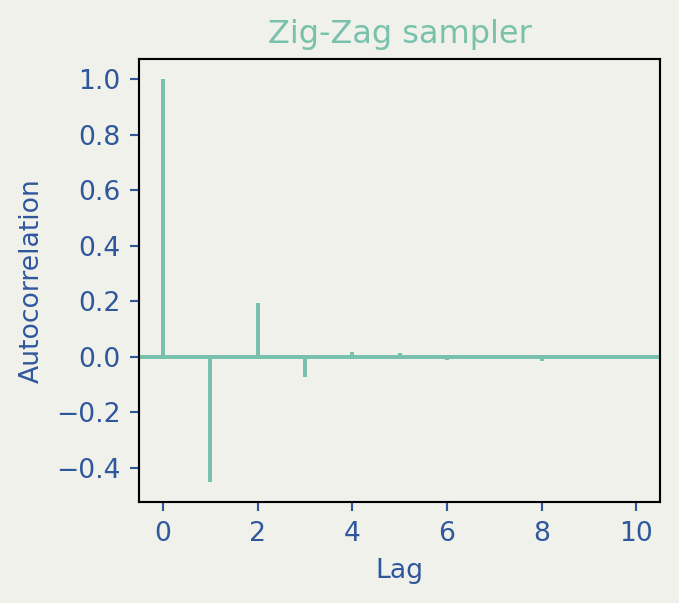

In [16]:
#| echo: false
#| fig-cap: Zig-Zag サンプラーの自己相関関数
#| label: fig-PDMP-auto
plt.figure(figsize=(3.5, 3), facecolor="#F0F1EB"
)
plt.acorr(samples_zigzag - np.mean(samples_zigzag), maxlags=10, color=minty)
plt.xlim(-0.5, 10.5)
#plt.ylim(-0.5,0.85)
# グラフの装飾
plt.title('Zig-Zag sampler', color=minty)
plt.tick_params(axis='x', colors=ISMblue)
plt.tick_params(axis='y', colors=ISMblue)
plt.xlabel('Lag', color=ISMblue)
plt.ylabel('Autocorrelation', color=ISMblue)
plt.savefig('zigzag_auto.svg', format='svg')
plt.gca().set_facecolor('#F0F1EB')
plt.show()

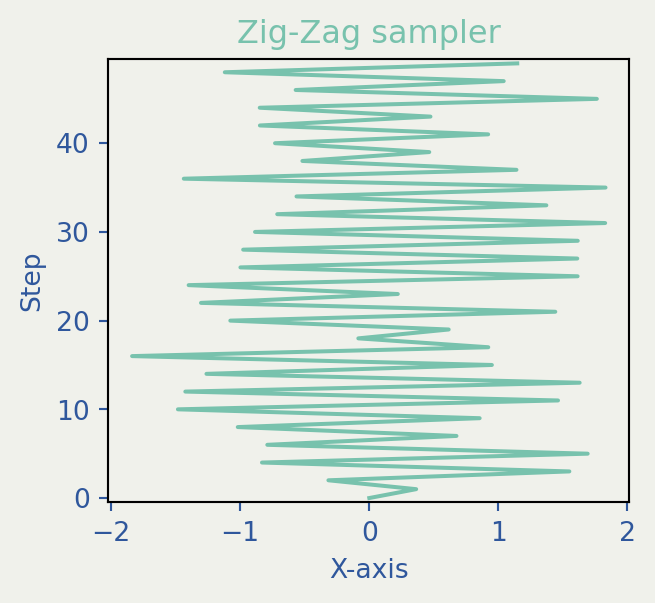

In [17]:
#| echo: false
#| fig-cap: Zig-Zag サンプラーの軌跡
#| label: fig-6
plt.figure(figsize=(3.5, 3), facecolor="#F0F1EB"
)
plt.plot(trajectory_zigzag[0:50], range(50), color=minty)
plt.ylim(-0.5, 49.5)
#plt.xlim(-1.2,1.2)
# グラフの装飾
plt.title('Zig-Zag sampler', color=minty)
plt.tick_params(axis='x', colors=ISMblue)
plt.tick_params(axis='y', colors=ISMblue)
plt.xlabel('X-axis', color=ISMblue)
plt.ylabel('Step', color=ISMblue)
plt.savefig('zigzag_traj.svg', format='svg')
plt.gca().set_facecolor('#F0F1EB')
plt.show()

In [18]:
diffs = np.diff(trajectory_zigzag)
abs_diffs = np.abs(diffs)
mean_abs_diff = np.mean(abs_diffs)
print(mean_abs_diff)

1.9232887144203465


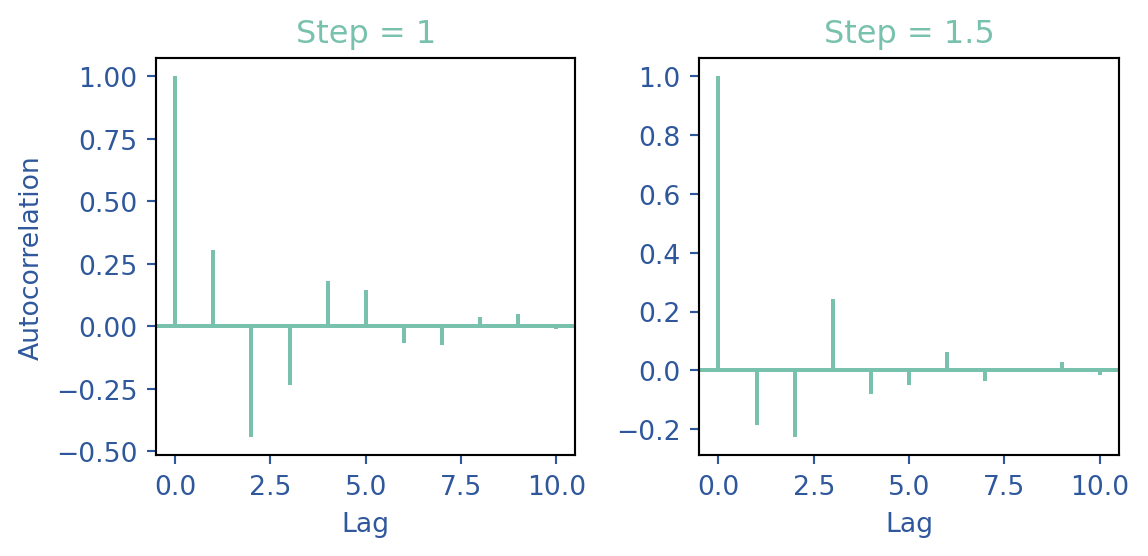

In [19]:
#| echo: false
samples_zigzag1, trajectory_zigzag1 = zigzag(num_samples, initial_state, step=1)
samples_zigzag2, trajectory_zigzag2 = zigzag(num_samples, initial_state, step=1.5)
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].acorr(samples_zigzag1 - np.mean(samples_zigzag1), maxlags=10, color=minty)
axs[0].set_xlim(-0.5, 10.5)
axs[0].set_title('Step = 1', color=minty)
axs[0].tick_params(axis='x', colors=ISMblue)
axs[0].tick_params(axis='y', colors=ISMblue)
axs[0].set_xlabel('Lag', color=ISMblue)
axs[0].set_ylabel('Autocorrelation', color=ISMblue)

# 2つ目のプロット：任意のプロット（例として軌跡をプロット）
axs[1].acorr(samples_zigzag2 - np.mean(samples_zigzag2), maxlags=10, color=minty)
axs[1].set_xlim(-0.5, 10.5)
axs[1].set_title('Step = 1.5', color=minty)
axs[1].tick_params(axis='x', colors=ISMblue)
axs[1].tick_params(axis='y', colors=ISMblue)
axs[1].set_xlabel('Lag', color=ISMblue)

# グラフを表示
plt.tight_layout()
plt.show()